In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')



# NOTE : Seaborn library is not updated in kaggle, hence I have attached
# graph from my notebook.

# Reading the CSV file:

In [ ]:
df = pd.read_csv("../input/credit-card-customers/BankChurners.csv")
df.head()

# Pre-Processing:

## 1. Dropping "CLIENTNUM" and last two Column:

In [ ]:
df = df.drop(["CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1"], axis=1)

## 2. There is not a single "NULL" value in the whole data set:

In [ ]:
df.info()

## 3. Printing all the unique value in a column with its total count:

In [ ]:
for i in  df.columns:
    print(df[i].value_counts())
    print("----------------")

# Visualizing the data:

In [ ]:
a=sns.FacetGrid(df, col="Education_Level", row="Gender")
a.map_dataframe(sns.countplot, x="Attrition_Flag", hue="Attrition_Flag", palette="tab10")
a.fig.subplots_adjust(wspace=0.5, hspace=0.3)
a.set_xticklabels(["", ""])
a.add_legend()

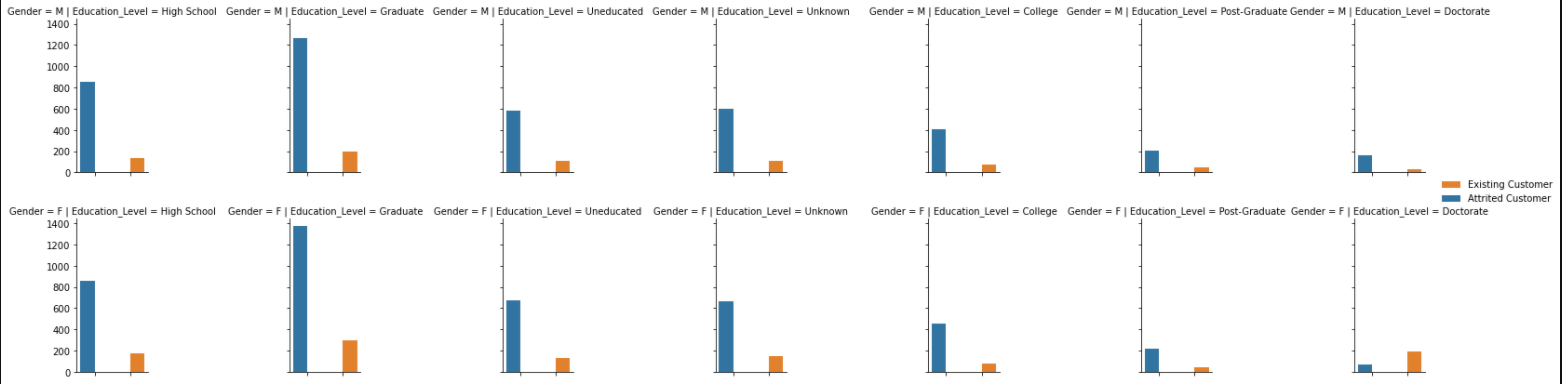

from my notebook

After plotting above graph, it is clearly seen that the maximum number of active members belong to "Graduated". And it decreases rapidly in the next phase i.e "Post-Graduate" and again in "Doctorate". The bank manager can use this data to give extra facilities to "Graduated" group and keep them as active members.

In [ ]:
fig = plt.figure(figsize=(12, 12))

fig.add_subplot(211)
sns.countplot(x=df["Customer_Age"][df["Gender"]=="M"], hue=df["Attrition_Flag"])
plt.text(x=5, y=150, s="FOR MALE")

fig.add_subplot(212)
sns.countplot(x=df["Customer_Age"][df["Gender"]=="F"], hue=df["Attrition_Flag"])
plt.text(x=5, y=150, s="FOR FEMALE")

plt.show()

This plot shows that the number of active member increase as the age increase and later it decreases, that's an obvious thing. But above this, the number of existed members between that peak i.e age 35-55 in "Female" is greater than in "Male". Bank manager should pay extra attention to keep those "Female" accounts stick.

In [ ]:
df["Income_Category"].value_counts()

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Income_Category", binwidth=1, hue="Attrition_Flag")

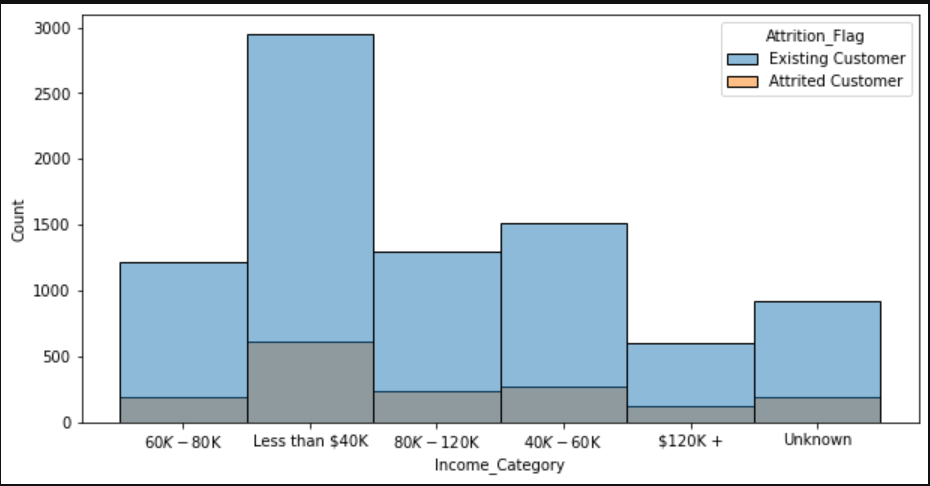

This plot show that the probablity that member will stick to the bank is very very high in the group having income 
"Less than $40K" as compare to other. 

The graph is fairly saturated and gives not much information.

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Card_Category", binwidth=1, hue="Attrition_Flag")

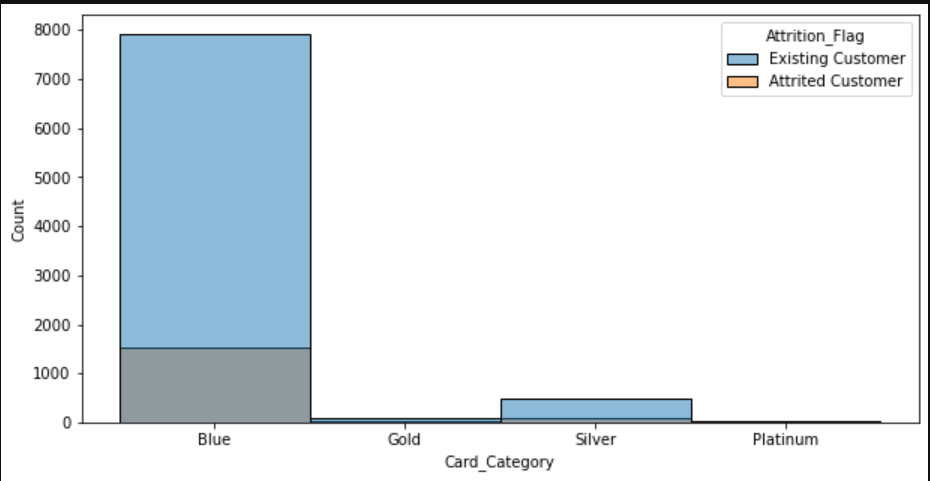

This plot also dont give much information. It just shows that most of the member have "Blue" i.e. the basic card only.
Bank should provide much more benefits of having premium cards to increase there subcriptions.

In [ ]:

fig = plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Months_Inactive_12_mon", binwidth=1, hue="Attrition_Flag")

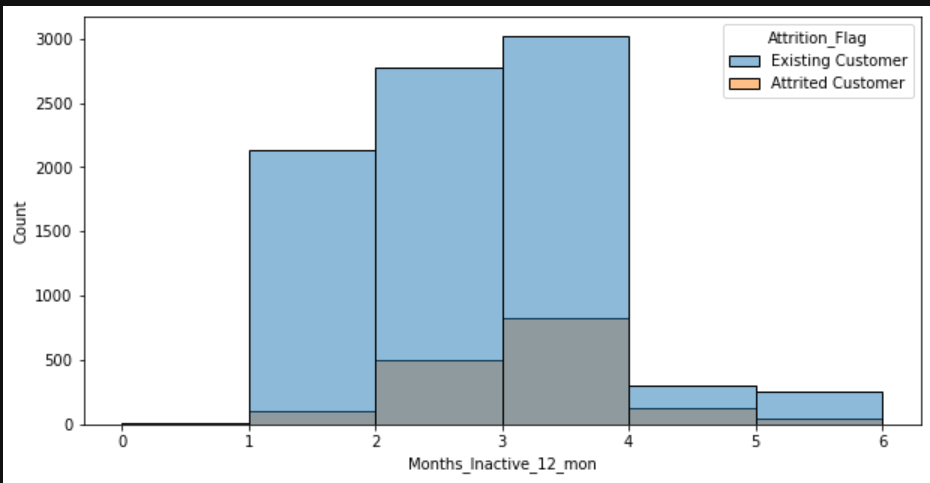

This plot can be very benefical, this graph shows that a person to be inactive is "3 Months" after which they get into active membership. The bank manager should give some cashbacks if the person uses card/account atleast one time for consecutive for 2 monthns, it will decrease the time period of the member to be inactive from 3 months to 1-2 months at most and hence reducing the number. 

## CONCLUSION:

#### The bank should give cashback regularly with extra features (*low interest*) for member having <$40K income and bank should provide more benefits to premium cards.

# Pre-Processing 2:

# 1. LabelEncoding:

In [ ]:
df.info()

In [ ]:
from sklearn.preprocessing import LabelEncoder

class label_encoding:
    def __init__(self, name):
        self.name = name
        self.le = LabelEncoder()
        df[name] = self.le.fit_transform(df[name])
        self.give_function()
    
    def inverse(self, i):
        return self.le.inverse_transform([i])
    
    def transform(self, col):
        return self.le.transform(col)
        
    def give_function(self):
        return self.le

In [ ]:
le = {}

for val in df.columns:
    if df[val].dtypes == 'object':
         le[val] = label_encoding(val)

In [ ]:
for val in le.keys():
    for i in range(0, len(df[val].value_counts())):
        print('The value for {} in {} is {}'.format(i, val, le[val].inverse(i).item()))
    else:
        print("---------------------- \n \n ")
        

# CORRELATION PLOT:

In [ ]:
fig = plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 9})

In [ ]:
corr = {}

for idx1 in df.columns:
    corr[idx1] = {'Positive': [], 'Negetive': []}
    
    for idx2 in df.columns:
        if not idx1 == idx2:
            if (df[idx1].corr(other=df[idx2])) > 0.25:
                corr[idx1]["Positive"].append(idx2)
                
            
            if (df[idx1].corr(other=df[idx2])) < -0.25:
                corr[idx1]["Negetive"].append(idx2)
                

I have created a dict in which every columns have item that have positive and negetive with the same.

EX:

In [ ]:
corr["Attrition_Flag"]

## X and y split:

In [ ]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

print(X.shape, y.shape)

## SOM:

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

SOM = SelectKBest(chi2, k=8)
X_new_som = SOM.fit_transform(X, y)
X_new_som.shape

## PCA:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_new_pca = pca.fit_transform(X, y)
X_new_pca.shape

## Test Train split:

In [ ]:
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_new_pca, y, test_size=0.33, random_state=0)
X_train_som, X_test_som, y_train, y_test = train_test_split(X_new_som, y, test_size=0.33, random_state=0)

In [ ]:
from sklearn import tree

clf_pca = tree.DecisionTreeClassifier()
clf_pca = clf_pca.fit(X_train_pca, y_train)

clf_som = tree.DecisionTreeClassifier()
clf_som = clf_som.fit(X_train_pca, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_pca = clf_pca.predict(X_test_pca)
y_pred_som = clf_som.predict(X_test_som)


In [ ]:
accuracy_score(y_test, y_pred_pca)

In [ ]:
accuracy_score(y_test, y_pred_som)

### The PCA is more suitable in this senerio.

# THANK YOU.
## Leave a like 👍.

## PEACE :)